In [1]:
import cv2
from math import cos, sin, radians
import numpy as np
import matplotlib.pyplot as plt

对lena图像依次进行了平移、水平镜像、垂直镜像、旋转15°以及上面四种操作的复合处理，分别输出原图与每组处理后的图片对比（原灰度图在左边）。

平移


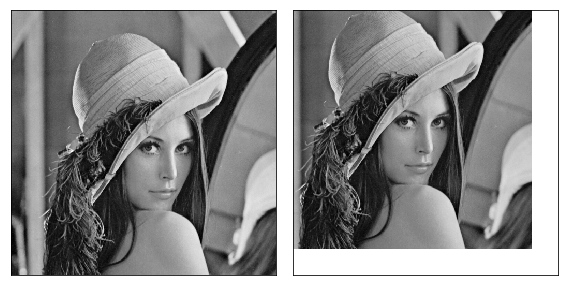

水平镜像


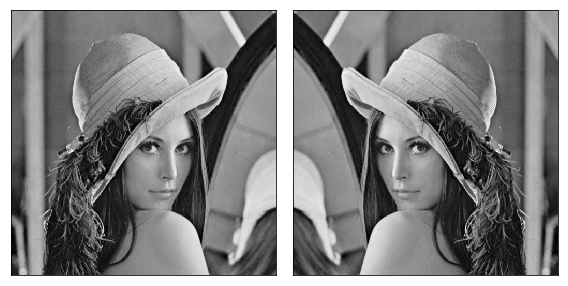

垂直镜像


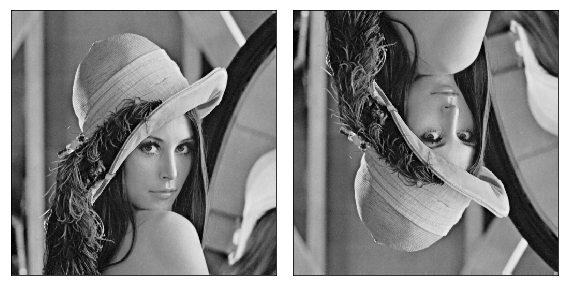

旋转15°


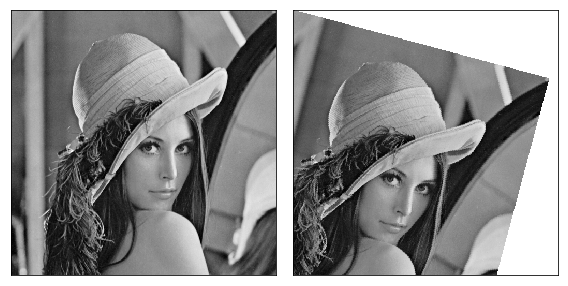

复合变换


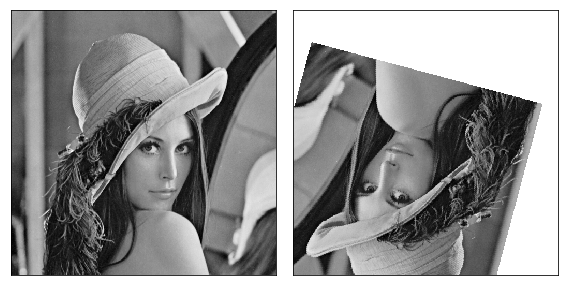

In [2]:
from re import S


class Img(object):
    def __init__(self,img):
        self.img = img

    #平移
    def trans(self,delta_x,delta_y):
        self.transform = np.array([[1,0,delta_x],[0,1,delta_y],[0,0,1]])

    #水平镜像
    def horizontal_mirror(self):
        self.transform = np.array([[1,0,0],[0,-1,self.img.shape[0]-1],[0,0,1]])
    
    #垂直镜像
    def Vertical_mirror(self):
        self.transform = np.array([[-1,0,self.img.shape[1]-1],[0,1,0],[0,0,1]])
        
    
    #旋转
    def rotate(self,beta):
        self.transform = np.array([[cos(beta),-sin(beta),0],[sin(beta),cos(beta),0],[0,0,1]])
    
    def geometric_operate(self):
        self.new_img = np.zeros((self.img.shape[0],self.img.shape[1]))
        for i in range(self.img.shape[0]):
            for j in range(self.img.shape[1]):
                original_pos = np.array([i,j,1])
                target_pos = np.dot(self.transform,original_pos)
                x = int(target_pos[0])
                y = int(target_pos[1])

                if x >= self.img.shape[0] or y >= self.img.shape[1] or x < 0 or y < 0:
                    self.new_img[i][j] = 255
                else:
                    self.new_img[i][j] = self.img[x][y]
                

if __name__ =='__main__':
    img = cv2.imread('lena.jpg',0)
    image = Img(img)

    #平移
    print('平移')
    image.trans(50,50)
    image.geometric_operate()
    plt.figure(figsize=(8, 4))
    plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(image.new_img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()


    #水平镜像
    print('水平镜像')
    image.horizontal_mirror()
    image.geometric_operate()
    plt.figure(figsize=(8, 4))
    plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(image.new_img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    #垂直镜像
    print('垂直镜像')
    image.Vertical_mirror()
    image.geometric_operate()
    plt.figure(figsize=(8, 4))
    plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(image.new_img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    #旋转
    print('旋转15°')
    image.rotate(radians(15))
    image.geometric_operate()
    plt.figure(figsize=(8, 4))
    plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(image.new_img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()


    #复合变换
    print('复合变换')
    image.trans(50,50)
    image.geometric_operate()
    image = Img(image.new_img)
    image.horizontal_mirror()
    image.geometric_operate()
    image = Img(image.new_img)
    image.Vertical_mirror()
    image.geometric_operate()
    image = Img(image.new_img)
    image.rotate(radians(15))
    image.geometric_operate()
    plt.figure(figsize=(8, 4))
    plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(image.new_img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

